In [1]:
import snntorch as snn
import torch

In [2]:
batch_size = 128
data_path = "./data/mnist"
num_classes = 10 # Number of classes in the dataset

dtype = torch.float

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0,),(1,))
])

mnist_train = datasets.MNIST(
    data_path,
    train = True,
    download = True,
    transform = transform
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:08<00:00, 1.20MB/s]


Extracting ./data/mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 113kB/s]


Extracting ./data/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 967kB/s] 


Extracting ./data/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]

Extracting ./data/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/mnist\MNIST\raw



In [4]:
from snntorch import utils

subset = 10
mnist_train = utils.data_subset(mnist_train, subset)
print(f"The size of the training set is {len(mnist_train)}")

The size of the training set is 6000


In [5]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    mnist_train,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
)

In [ ]:
num_steps = 10

raw_vector = torch.ones(num_steps) * 0.5

rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

Converted vector: tensor([1., 0., 0., 1., 1., 0., 0., 0., 1., 0.])
The output is spiking 40.00% of the time.


In [17]:
num_steps = 100

raw_vector = torch.ones(num_steps) * 0.5

rate_coded_vector = torch.bernoulli(raw_vector)
print(f"Converted vector: {rate_coded_vector}")
print(f"The output is spiking {rate_coded_vector.sum()*100/len(rate_coded_vector):.2f}% of the time.")

Converted vector: tensor([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 0., 0.])
The output is spiking 44.00% of the time.


In [18]:
from snntorch import spikegen

# Iterate through minibatches
data = iter(train_loader)
data_it, targets_it = next(data)

# Spiking Data
spike_data = spikegen.rate(data_it, num_steps=num_steps)

In [19]:
print(spike_data.size())

torch.Size([100, 128, 1, 28, 28])


In [21]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML

In [22]:
spike_data_sample = spike_data[:, 0, 0]
print(spike_data_sample.size())

torch.Size([100, 28, 28])


Spike data sample size: torch.Size([100, 28, 28])
Sample values: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...

ValueError: x and y can be no greater than 2D, but have shapes (100,) and (100, 28, 28)

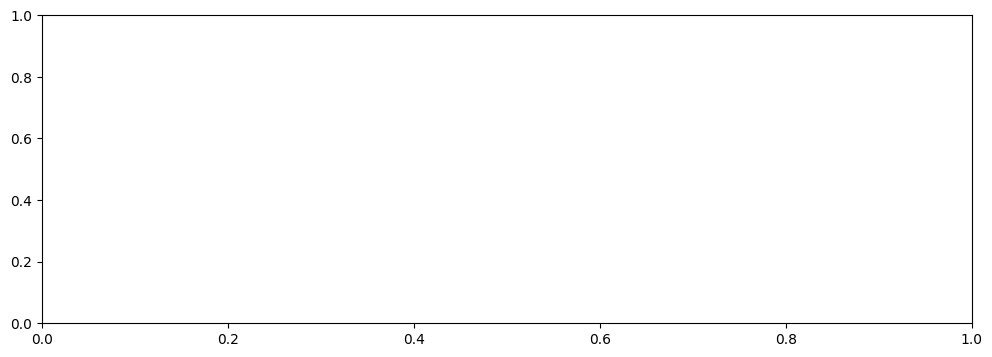

In [27]:
# First, let's see what we're working with
spike_data_sample = spike_data[:, 0, 0]
print(f"Spike data sample size: {spike_data_sample.size()}")
print(f"Sample values: {spike_data_sample}")

# Option 1: Simple line plot of spikes over time
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(spike_data_sample.numpy(), 'o-', markersize=4)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Spike Value (0 or 1)')
ax.set_title('Spike Train Over Time')
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.1, 1.1)
plt.show()

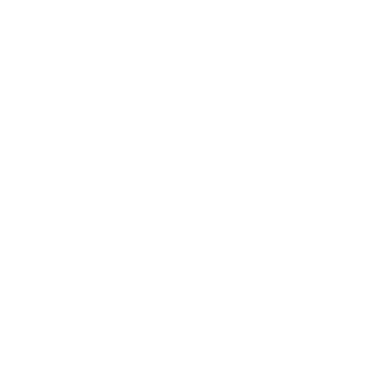

In [23]:
fig, ax = plt.subplots()
anim = splt.animator(spike_data_sample, fig, ax=ax)
HTML(anim.to_html5_video())